## Putting it all together

In [1]:
import seaborn as sns; sns.set_style("dark")
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, StandardScaler, Normalizer, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import janitor
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, ElasticNetCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix
from sklearn.feature_selection import RFECV
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
import janitor

In [2]:
data = pd.read_csv("data/bankchurnersuse.csv").clean_names()

In [3]:
data

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [4]:
train, test = train_test_split(data, random_state = 10, train_size = 0.8, stratify = data["attrition_flag"])

In [5]:
train, test_init = train_test_split(train, random_state = 10, train_size = 0.8, stratify = train["attrition_flag"])

In [6]:
train.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
2147,770882508,Existing Customer,38,M,2,College,Married,$80K - $120K,Blue,24,...,1,5,17162.0,773,16389.0,1.238,2457,54,1.000,0.045
7967,712200033,Existing Customer,44,F,4,High School,Single,Less than $40K,Blue,36,...,3,3,3024.0,0,3024.0,0.750,4983,78,0.733,0.000
9892,806917983,Existing Customer,32,F,2,Graduate,Divorced,Unknown,Silver,27,...,3,1,33779.0,1526,32253.0,0.879,15200,126,0.800,0.045
7983,715463133,Existing Customer,40,M,5,High School,Single,$120K +,Blue,31,...,1,3,34516.0,1427,33089.0,0.706,3699,64,0.488,0.041
5638,711824358,Existing Customer,44,F,4,College,Single,Less than $40K,Blue,31,...,3,2,3228.0,0,3228.0,0.747,4524,70,0.667,0.000


In [7]:
test.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
3933,815240358,Existing Customer,47,F,3,Uneducated,Married,Unknown,Blue,42,...,1,4,25027.0,1501,23526.0,1.063,3357,62,0.771,0.060
2790,779284833,Existing Customer,55,M,2,Post-Graduate,Single,$60K - $80K,Blue,37,...,3,1,22127.0,1799,20328.0,0.758,3591,63,0.750,0.081
8663,719658858,Existing Customer,50,F,4,Doctorate,Married,Unknown,Silver,36,...,2,1,34516.0,2096,32420.0,0.666,7042,73,0.553,0.061
731,719459358,Existing Customer,52,M,1,Doctorate,Married,$120K +,Blue,41,...,2,2,33864.0,989,32875.0,1.219,1751,48,0.920,0.029
3335,734924658,Existing Customer,47,F,5,High School,Married,Less than $40K,Blue,36,...,3,1,1478.0,792,686.0,0.873,4123,67,0.489,0.536


### Hardcoded Feature Engineering

In [8]:
train["revolving_trans"] = train["total_revolving_bal"]/train["total_trans_amt"]
test_init["revolving_trans"] = test_init["total_revolving_bal"]/test_init["total_trans_amt"]
test["revolving_trans"] = test["total_revolving_bal"]/test["total_trans_amt"]

In [9]:
train["marriage_education"] = train["marital_status"] + "_" + train["education_level"]
test_init["marriage_education"] = test_init["marital_status"] + "_" + test_init["education_level"]
test["marriage_education"] = test["marital_status"] + "_" + test["education_level"]

In [10]:
train["attrition_flag"] = train["attrition_flag"].replace(["Attrited Customer","Existing Customer"], [1,0]).astype(int)
test["attrition_flag"] = test["attrition_flag"].replace(["Attrited Customer","Existing Customer"], [1,0]).astype(int)
test_init["attrition_flag"] = test_init["attrition_flag"].replace(["Attrited Customer","Existing Customer"], [1,0]).astype(int)

### Data deduplication

In [11]:
train_0 = train[train["attrition_flag"] == 0]
train_0.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,revolving_trans,marriage_education
2147,770882508,0,38,M,2,College,Married,$80K - $120K,Blue,24,...,17162.0,773,16389.0,1.238,2457,54,1.000,0.045,0.314611,Married_College
7967,712200033,0,44,F,4,High School,Single,Less than $40K,Blue,36,...,3024.0,0,3024.0,0.750,4983,78,0.733,0.000,0.000000,Single_High School
9892,806917983,0,32,F,2,Graduate,Divorced,Unknown,Silver,27,...,33779.0,1526,32253.0,0.879,15200,126,0.800,0.045,0.100395,Divorced_Graduate
7983,715463133,0,40,M,5,High School,Single,$120K +,Blue,31,...,34516.0,1427,33089.0,0.706,3699,64,0.488,0.041,0.385780,Single_High School
5638,711824358,0,44,F,4,College,Single,Less than $40K,Blue,31,...,3228.0,0,3228.0,0.747,4524,70,0.667,0.000,0.000000,Single_College


In [12]:
train_1 = train[train["attrition_flag"] == 1]
train_1.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,revolving_trans,marriage_education
5562,787665258,1,47,F,3,Unknown,Married,Less than $40K,Blue,37,...,1438.3,0,1438.3,0.749,2393,36,0.636,0.0,0.0,Married_Unknown
6731,711122958,1,41,F,3,Graduate,Single,Less than $40K,Blue,33,...,1764.0,0,1764.0,0.552,2105,57,0.839,0.0,0.0,Single_Graduate
2174,712551258,1,39,M,1,Uneducated,Married,Less than $40K,Blue,36,...,4247.0,0,4247.0,0.405,847,17,0.133,0.0,0.0,Married_Uneducated
7973,820694133,1,60,F,0,High School,Married,Unknown,Blue,55,...,5549.0,0,5549.0,0.703,2412,38,0.520,0.0,0.0,Married_High School
2284,710586483,1,26,F,0,High School,Single,Unknown,Blue,13,...,6152.0,0,6152.0,0.391,968,23,0.533,0.0,0.0,Single_High School


In [13]:
train_0 = train_0.drop_duplicates()

### Class balancing

In [14]:
rand_list = list(np.random.randint(0, len(train_0), len(train_1)))

In [15]:
train_0 = train_0.iloc[rand_list,]
train_0.shape

(1041, 23)

In [16]:
train_new = pd.concat([train_0, train_1], axis = 0)
train_new.head()

,clientnum,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,...,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio,revolving_trans,marriage_education
2595,798769458,0,29,F,1,High School,Single,Less than $40K,Blue,23,...,3318.0,927,2391.0,0.934,3011,83,0.804,0.279,0.307871,Single_High School
4234,813427833,0,45,F,4,Graduate,Single,Less than $40K,Blue,40,...,2110.0,844,1266.0,1.109,4812,77,0.604,0.400,0.175395,Single_Graduate
4389,712089108,0,49,M,3,Uneducated,Divorced,$80K - $120K,Blue,37,...,28390.0,1141,27249.0,0.919,4631,76,0.949,0.040,0.246383,Divorced_Uneducated
6290,717500133,0,42,M,4,Uneducated,Single,$80K - $120K,Blue,36,...,10374.0,599,9775.0,0.635,4240,63,0.853,0.058,0.141274,Single_Uneducated
3490,756629133,0,61,F,1,Graduate,Single,Less than $40K,Blue,54,...,2721.0,0,2721.0,0.734,2088,37,0.682,0.000,0.000000,Single_Graduate


### Splitting into independent and dependent variables

In [17]:
x_train, y_train = train_new.drop(['attrition_flag','gender','clientnum'], axis = 1), train_new["attrition_flag"]

In [18]:
x_test_init, y_test_init = test_init.drop(['attrition_flag','gender','clientnum'], axis = 1), test_init["attrition_flag"]

In [19]:
x_test, y_test = test.drop(['attrition_flag','gender','clientnum'], axis = 1), test["attrition_flag"]

### Gathering categorical and numerical columns

In [20]:
num = []
cat = []
columns = list(x_train.columns)
for col in columns:
    if is_numeric_dtype(x_train[col]):
        num.append(col)
    elif is_string_dtype(x_train[col]):
        cat.append(col)

### Preprocessing tools

In [21]:
one_hot = OneHotEncoder()
min_max = MinMaxScaler()
sd = StandardScaler()
le = LabelEncoder()

In [22]:
ct = ColumnTransformer([("one_hot", one_hot, cat), ("min_max", min_max, num)])

### Pipeline Creation

In [23]:
pipeline = Pipeline([("ct", ct), ("rfe", RFECV(Lasso(), min_features_to_select=20, step=10)), ("svc", SVC())])

### Cross Validation via pipeline

In [24]:
cross_val_score(pipeline, x_train, y_train, cv = 5, scoring = "precision")

array([0.61009174, 0.62827225, 0.63255814, 0.64319249, 0.59330144])

### Fitting pipeline on training data

In [25]:
model = pipeline.fit(x_train, y_train)

### Evaluating pipeline's accuracy

#### Training data results

In [26]:
pred_train = model.predict(x_train)
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.67      0.66      0.66      1041
           1       0.66      0.67      0.67      1041

    accuracy                           0.66      2082
   macro avg       0.66      0.66      0.66      2082
weighted avg       0.66      0.66      0.66      2082



<AxesSubplot:>

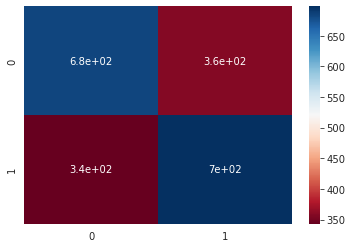

In [27]:
conf = confusion_matrix(y_train, pred_train)
sns.heatmap(conf, annot = True, cmap = "RdBu")

In [28]:
#train_new["prediction"] = pred_train
#train_probs = model.predict_proba(x_train)
#train_new["prob_0"], train_new["prob_1"] = train_probs[:,0], train_probs[:,1]
#train_new.head()

#### Initial test data results

In [29]:
pred_test_init = model.predict(x_test_init)
print(classification_report(y_test_init, pred_test_init))

              precision    recall  f1-score   support

           0       0.90      0.63      0.74      1360
           1       0.25      0.63      0.35       261

    accuracy                           0.63      1621
   macro avg       0.57      0.63      0.55      1621
weighted avg       0.79      0.63      0.68      1621



<AxesSubplot:>

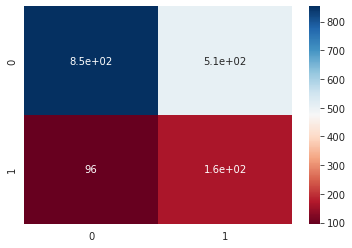

In [30]:
conf = confusion_matrix(y_test_init, pred_test_init)
sns.heatmap(conf, annot = True, cmap = "RdBu")

#### Hold out test data results

In [31]:
pred_test = model.predict(x_test)
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.90      0.61      0.73      1701
           1       0.24      0.65      0.35       325

    accuracy                           0.62      2026
   macro avg       0.57      0.63      0.54      2026
weighted avg       0.80      0.62      0.67      2026



<AxesSubplot:>

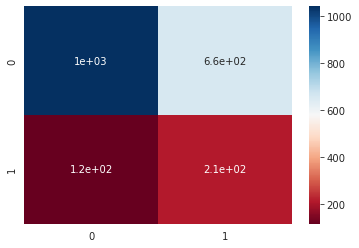

In [32]:
conf = confusion_matrix(y_test, pred_test)
sns.heatmap(conf, annot = True, cmap = "RdBu")

In [33]:
#test["prediction"] = pred_test
#test_probs = model.predict_proba(x_test)
#test["prob_0"], test["prob_1"] = test_probs[:,0], test_probs[:,1]
#test.head()

#### Feature Importance

In [34]:
permutation_importance(pipeline, x_train, y_train)

{'importances_mean': array([0.        , 0.        , 0.01219981, 0.02276657, 0.03439001,
        0.02689721, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.12804995, 0.01075889, 0.00192123]),
 'importances_std': array([0.        , 0.        , 0.00098901, 0.00436631, 0.00563087,
        0.00187258, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00658985, 0.00247906, 0.00060755]),
 'importances': array([[0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.01152738, 0.01104707, 0.01392891, 0.01200768, 0.01248799],
        [0.01825168, 0.02305476, 0.02545629, 0.02929875, 0.01777137],
        [0.02641691, 0.03698367, 0.04322767, 0.03410183, 0.03121998],
        [0.02737752, 0.02929875, 0.02353506, 0.0

In [35]:
vip = np.array(permutation_importance(pipeline, x_train, y_train)["importances_mean"])

In [36]:
vip

array([0.        , 0.        , 0.00874159, 0.023439  , 0.0326609 ,
       0.02497598, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.12363112, 0.0117195 , 0.00268972])

In [37]:
pipeline.steps[1][1].get_feature_names_out()

array(['x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14',
       'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x62',
       'x63'], dtype=object)

In [38]:
out_feat = list(pipeline.steps[1][1].get_feature_names_out())
out_feat_int = []

In [39]:
for feat in out_feat:
    out_feat_int.append(int(feat[1:]))
out_feat_int

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 62, 63]

In [40]:
feat = list(pipeline.steps[0][1].transformers_[0][1].get_feature_names()) + num

/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [41]:
out_feat_use = []
for i in out_feat_int:
    out_feat_use.append(feat[i])

In [42]:
out_feat_use

['x0_Uneducated',
 'x0_Unknown',
 'x1_Divorced',
 'x1_Married',
 'x1_Single',
 'x1_Unknown',
 'x2_$120K +',
 'x2_$40K - $60K',
 'x2_$60K - $80K',
 'x2_$80K - $120K',
 'x2_Less than $40K',
 'x2_Unknown',
 'x3_Blue',
 'x3_Gold',
 'x3_Platinum',
 'x3_Silver',
 'x4_Divorced_College',
 'x4_Divorced_Doctorate',
 'avg_utilization_ratio',
 'revolving_trans']

In [43]:
#create df with vip info
feature_importances_info = pd.DataFrame({'feat_names':out_feat_use, 'vip': vip})

#get sign and magnitude information
feature_importances_info = feature_importances_info.assign(feature_importances_mag = abs(feature_importances_info['vip']),
                             feature_importances_sign = np.sign(feature_importances_info['vip']))
feature_importances_info = feature_importances_info.set_index('feat_names').sort_values(by='feature_importances_mag', ascending=False)
feature_importances_info.head(10)

,vip,feature_importances_mag,feature_importances_sign
feat_names,,,
x4_Divorced_Doctorate,0.123631,0.123631,1.0
x1_Single,0.032661,0.032661,1.0
x1_Unknown,0.024976,0.024976,1.0
x1_Married,0.023439,0.023439,1.0
avg_utilization_ratio,0.011720,0.011720,1.0
x1_Divorced,0.008742,0.008742,1.0
revolving_trans,0.002690,0.002690,1.0
x3_Blue,0.000000,0.000000,0.0
x4_Divorced_College,0.000000,0.000000,0.0


/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/seaborn/categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
/accre/arch/easybuild/software/BinDist/Anaconda3/2022.05/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


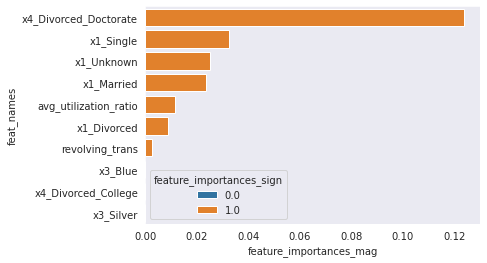

In [44]:
sns.barplot(y=feature_importances_info.index[:10], x='feature_importances_mag', hue='feature_importances_sign', 
            data=feature_importances_info[:10], orient='h', dodge=False);